> This assignment as two parts Section A and B. The first part is the implementation of function required in applying the CNN layers and the next section will be around the use of built in function of Tensorflow



`Before moving ahead as we have reached the stage of applying CNNs. We are going to deal with large number of parameters and hence more computational power. So you will need to connect runtime of collab to GPU: https://www.youtube.com/watch?v=-9CLfrZISRw`

### **BOTH THE SECTION CAN BE SOLVED INDEPENDENTLY** BUT SECTION A has **3X** more weightage than SECTION B doesn't have any code to write.

## **SECTION:A**

In [89]:
import numpy as np

### Q1: Complete the following function corr2d(X, K), which implements the cross correlation operation for matrix X and kernel K, both are two dimensional numpy arrays (height x width). The function should return a 2 dimensional numpy array which is the result of cross correlation operation between X and K. 

- not giving channels right now : assume channels = 1

In [90]:
def corr2d(X: np.array, K: np.array) -> np.array:
  X_height,Y_weight = len(X[:,0]),len(X[0])
  if K.ndim ==1:
    K_height,K_weight = 1,len(K)
  else:
    K_height,K_weight = K.shape
  Y_height = X_height- K_height+ 1
  Y_weight =  Y_weight - K_weight + 1
  Y_ = np.zeros((Y_height, Y_weight))
  for i in range(Y_.shape[0]):
    for j in range(Y_.shape[1]):
      Y_[i, j] = np.sum(X[i:i+K_height, j:j+K_weight] * K)
  return Y_
    

  


In [91]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
K = np.array([[0.0, 1.0], [2.0, 3.0]], dtype=np.float32)
print(corr2d(X, K)) # example done in class, try to print this and check if you get the right answer

[[19. 25.]
 [37. 43.]]


### now try to make a new function corr2d_multiple_input_channels(X, K) : where each X and K have the same number of channels, both of them are now 3 dimensional numpy arrays, the output should be a 2 dimensional numpy array (output_h, output_w).

- hint : Use the above corr2d function and read about np.stack

In [92]:
def corr2d_multiple_input_channels(X: np.array, K: np.array) -> np.array: 
   X_width = len(X[0,0])
   X_height = len(X[0,:,0])
   K_width = len(K[0])
   K_height = len(K[0,:])
   Y_width = X_width-K_width +1
   Y_height = X_height-K_height+1
   Y = np.zeros((Y_width,Y_height))
   for k in range(len(K)):
    for i in range(Y_width):
      for j in range(Y_height):
        Y[i,j]= Y[i,j]+ np.sum(X[k,i:i+K_width,j:j+K_height]*[K[k]])
   return Y

In [93]:
new_X = np.stack([X, X+1, X+2], axis=0) # stacking along a new dimension
new_K = np.stack([K, K+1, K+2], axis=0) 

print(f"new_X.shape = {new_X.shape}, new_K.shape = {new_K.shape}")
print(corr2d_multiple_input_channels(new_X, new_K))
# calculate the output by hand and then check whether you get the same answer
# answer should be a 2 dim np array : (output_height, output_width) 

new_X.shape = (3, 3, 3), new_K.shape = (3, 2, 2)
[[119. 149.]
 [209. 239.]]


### Write another function corr2d_mutli_in_out(X, K): where X (3 dim np array), K (4 dim numpy array), 0th dimension of K represents the number of kernel/filters we are using. Perform the cross correlation operation for K on X and return the output : 3 dim numpy array whose shape should be (num_output_channels, output_height, output_width)

- hint : use the above corr_2d_mutliple_input_channels(X, K) for each kernel in K and then stack them.

In [94]:
def corr2d_multi_in_out(X: np.array, K: np.array) -> np.array:
  X_width = len(X[0,0])
  X_height = len(X[0,:,0])
  K_width = len(K[0,0])
  K_height = len(K[0,0,:,0])
  Y_width = X_width-K_width +1
  Y_height = X_height-K_height+1
  Y = np.zeros((len(K),Y_width,Y_height))
  for p in range(len(K)):
    for k in range(len(K[0])):
      for i in range(Y_width):
        for j in range(Y_height):
          Y[p,i,j] = Y[p,i,j]+ np.sum(X[k,i:i+Y_width,j:j+Y_height]*my_K[p][k])
  return Y
    

In [95]:
my_K = np.stack([new_K, new_K+1, new_K+2, new_K + 3], axis=0) 
print(f"my_K.shape = {my_K.shape}")

print(corr2d_multi_in_out(new_X, my_K)) # cross check the calculation

my_K.shape = (4, 3, 2, 2)
[[[119. 149.]
  [209. 239.]]

 [[155. 197.]
  [281. 323.]]

 [[191. 245.]
  [353. 407.]]

 [[227. 293.]
  [425. 491.]]]


### Q2: What is the computational and statistical benefits of stride larger than 1?? (not more than 20 word answer for each)
Ans-Stride helps to reduce the size of output feature map which reduce computational power and saves time.It reduces the dimensionality which help in having more important features at the end and helps extracts important features at last. 

### Q3: Now let's implement a model with just a single convolution layer, given X(input), Y(output) and K(kernel). Y is the output of the cross-correlation operation of K on X. You need to build a model to learn that kernel K.(try to print the kernel at each epoch)

- hint : conv_layer(output_channels = 1, input_channels = 1, kerenl_size=(1, 2), bias=False)

In [96]:
X = np.ones((6, 8), dtype=np.float32)
X[:, 2:6] = 0
print(X)

[[1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]]


In [97]:
K = np.array([1.0, -1.0], dtype=np.float32) # kernel, you need to learn this using a model
Y = corr2d(X, K) 
print(Y)

[[ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]]


In [98]:
X = X.reshape((1, 1, 6, 8)) # this will be the input to the model
Y = Y.reshape((1, 1, 6, 7)) # this is the output, to be used while calculation loss
lr = 3e-2 # use this learning rate

In [99]:
class model:
    def __init__(self,lr,epochs):
        self.lr = lr
        self.epochs = epochs
    def fit(self,X,Y):
        X = X.reshape((X.shape[2],X.shape[3]))
        Y = Y.reshape((Y.shape[2],Y.shape[3]))
        
        K = np.ones((1,2))
        K_ = np.zeros((1,2))
        for i in range(self.epochs):
            Y_Pred = corr2d(X,K)
            Loss = 2*(Y-Y_Pred)
            for i in range(1):
                for j in range(2):
                    K_[i,j] = np.sum(X[i:i+Loss.shape[1],j:j+Loss.shape[1]]*Loss)
            K = K + lr*K_
            print(K)

In [100]:
gd = model(3e-2,100)
gd.fit(X,Y)

[[-0.44 -1.16]]
[[1.2304 0.0496]]
[[ 0.225856 -1.249856]]
[[ 1.24182784 -0.42262784]]
[[ 0.56494582 -1.22030582]]
[[ 1.19342452 -0.66913652]]
[[ 0.74630433 -1.16573473]]
[[ 1.13962466 -0.80408034]]
[[ 0.84776787 -1.11620333]]
[[ 1.09584497 -0.8810966 ]]
[[ 0.90672196 -1.07852065]]
[[ 1.06399711 -0.92655816]]
[[ 0.9420021  -1.05195327]]
[[ 1.04204618 -0.95408525]]
[[ 0.96357769 -1.03394643]]
[[ 1.02735522 -0.97106022]]
[[ 0.97697494 -1.02201094]]
[[ 1.01768988 -0.98166108]]
[[ 0.98538079 -1.01420383]]
[[ 1.01139629 -0.98833786]]
[[ 0.99069156 -1.0091383 ]]
[[ 1.00732425 -0.99256686]]
[[ 0.9940622  -1.00586811]]
[[ 1.00470007 -0.99525533]]
[[ 0.99620783 -1.00376362]]
[[ 1.00301318 -0.99696855]]
[[ 0.9975763  -1.00241201]]
[[ 1.00193054 -0.99806198]]
[[ 0.99845018 -1.00154503]]
[[ 1.00123641 -0.99876053]]
[[ 0.99900867 -1.00098937]]
[[ 1.00079165 -0.99920709]]
[[ 0.99936577 -1.00063342]]
[[ 1.0005068  -0.99949268]]
[[ 0.99959419 -1.00040548]]
[[ 1.00032441 -0.99967538]]
[[ 0.99974032 -1.0

### Q4: Complete the following function max_pool2d(X, K) which performs maxpooling with kernel size K on X and returns and two dim numpy array

In [101]:
def max_pool2d(X: np.array, K: tuple) -> np.array:
  X_height,X_width = X.shape
  K_height,K_width = K[0],K[1]
  Y_width = X_width-K_width +1
  Y_height = X_height-K_height+1
  Y = np.ones((Y_width,Y_height))
  for i in range(Y_width):
    for j in range(Y_height):
      Y[i,j] = np.max(X[i:i+K_width,j:j+K_height])
  return Y
    

In [102]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
max_pool2d(X, (2, 2)) # check if the output matches with your calculation

array([[4., 5.],
       [7., 8.]])

# **SECTION:B**



### **JUST RUN THE CELLS AND VISUALIZE**( Nothing to code 🙂 )

> Indented block



In [103]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [104]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

In [105]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(35000, 32, 32, 3)
(15000, 32, 32, 3)
(35000, 1)
(15000, 1)


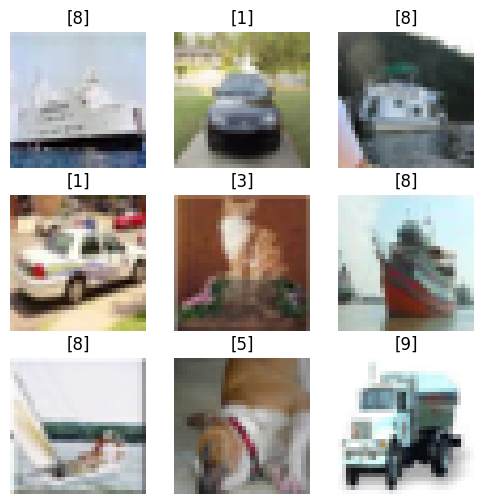

In [106]:
#Lets visualize the CIFAR-10 dataset

import random
figure = plt.figure(figsize=(6,6))

for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[index])
  plt.title(Y_train[index])
  plt.axis(False)

In [107]:
"""
So you can probably notice here that the images are 3D(coloured) but still 
not of great quality ( what can you expect from 32x32 image). Also there are
certain other factors which makes the classification a bit tougher than the 
cases of 2D( the digit and the fashion data) you dealt before. We will try to
understand the difficulties and find probable solution for them.
"""

'\nSo you can probably notice here that the images are 3D(coloured) but still \nnot of great quality ( what can you expect from 32x32 image). Also there are\ncertain other factors which makes the classification a bit tougher than the \ncases of 2D( the digit and the fashion data) you dealt before. We will try to\nunderstand the difficulties and find probable solution for them.\n'

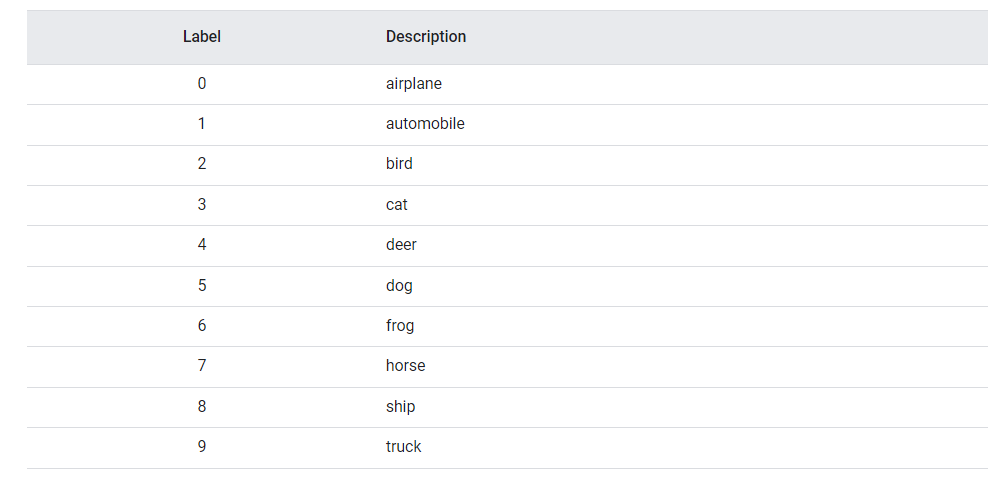

In [108]:
"""
Lets first start with the CNN model discussed in the class for digit
 classification. Notice that I have changed the input shape for this usecase.
 Earlier it was (28,28,1) for the digit dataset.
"""

'\nLets first start with the CNN model discussed in the class for digit\n classification. Notice that I have changed the input shape for this usecase.\n Earlier it was (28,28,1) for the digit dataset.\n'

In [109]:
# model initialization
cnn_model = tf.keras.Sequential()

# adding the 1st layer of CNN
cnn_model.add(tf.keras.layers.Conv2D(26, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#adding another CNN layer
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [110]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [111]:
"""
Explain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]
An optimizer is an algorithm that helps reduce the loss function in a neural network by changing the model parameters like weights and learnimg rates.Adam or Adaptive Moment Estimation optimizer can be
considered as an extension of stochastic gradient desecnt.Adam is widely used and is preferred while trainig a neural network,because it compute individual learning rate for different parameters.It requires low memory when compared to other optimizers.
In SGD, we know that a single learning rate is used throughout but adam optimizer works in a  different way.It updates
the learning rate for each network weight individually.It is better in terms of generalising performance than other optimizers.It requires
less tuning than other optimizers.It adapts the learning rate on the basis of  first and second moment of the gradient unlike the other optimizers.These moments are estimated using exponentially decaying moving averages.
It combines two different optimizers 'momentum'and 'RMSP'.Momentum helps to speed up the gradient descent algorithm by taking exponentially weighted average of gradients.
In RMSP we take exponential average.It mainly focuses on speeding up optimization process by decreasing the number of evolutions
to reach local minimum.But it does not generalises well.Adam allows faster convergence and give more efficiency.Adam may be the best optimizer and generalises well
to many problems but sometimes depending on model architeacture some other optimizer may be a better choice.
Link - https://optimization.cbe.cornell.edu/index.php?title=Adam

Answer:
"""

"\nExplain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]\nAn optimizer is an algorithm that helps reduce the loss function in a neural network by changing the model parameters like weights and learnimg rates.Adam or Adaptive Moment Estimation optimizer can be\nconsidered as an extension of stochastic gradient desecnt.Adam is widely used and is preferred while trainig a neural network,because it compute individual learning rate for different parameters.It requires low memory when compared to other optimizers.\nIn SGD, we know that a single learning rate is used throughout but adam optimizer works in a  different way.It updates\nthe learning rate for each network weight individually.It is better in terms of generalising performance than other optimizers.It requires\nless tuning than other optimizers.It adapts the learning rate on the basis of  first and second moment of the gradient unlike the other optimizers.These moments are estimated using exponentiall

### **Make sure that you are connected to GPU runtime other wise the training in next cell is going to take a long time**

In [112]:
history = cnn_model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10
875/875 [==============================] - 6s 5ms/step - loss: 2.5204 - accuracy: 0.1003 - val_loss: 2.3029 - val_accuracy: 0.0983
Epoch 2/10
875/875 [==============================] - 5s 5ms/step - loss: 2.3027 - accuracy: 0.1009 - val_loss: 2.3032 - val_accuracy: 0.0984
Epoch 3/10
875/875 [==============================] - 4s 4ms/step - loss: 2.3025 - accuracy: 0.1018 - val_loss: 2.3033 - val_accuracy: 0.0983
Epoch 4/10
875/875 [==============================] - 4s 4ms/step - loss: 2.3022 - accuracy: 0.1009 - val_loss: 2.3035 - val_accuracy: 0.1031
Epoch 5/10
875/875 [==============================] - 4s 5ms/step - loss: 2.3019 - accuracy: 0.1016 - val_loss: 2.3036 - val_accuracy: 0.1034
Epoch 6/10
875/875 [==============================] - 4s 4ms/step - loss: 2.3012 - accuracy: 0.1031 - val_loss: 2.3033 - val_accuracy: 0.0986
Epoch 7/10
875/875 [==============================] - 4s 4ms/step - loss: 2.3011 - accuracy: 0.0990 - val_loss: 2.3056 - val_accuracy: 0.0959
Epoch 

In [113]:
""" 
Write about validation accuracy in 100 words.
validation accuracy is the accuracy(model parameter to know how our model works) of validation data.Validation data is different from training data,it is used to inspect or validate our model
during training process itself.It is done to reduce the chances of overfitting of model and make the model better.The model works on both the trainging data and validation data during training process 
but weights are not modified using validation data it is just used to check whether our model can perform similarly for validation data as training data.if the validation accuracy is
lower than the training accuracy it may be the case of overfitting as the model is not generalising its performance.If the validation accuracy is higher than training accuracy,it 
will tell us that that the model need to be more trained.And we can change the hyperparameters according to that.
Answer: 
"""

' \nWrite about validation accuracy in 100 words.\nvalidation accuracy is the accuracy(model parameter to know how our model works) of validation data.Validation data is different from training data,it is used to inspect or validate our model\nduring training process itself.It is done to reduce the chances of overfitting of model and make the model better.The model works on both the trainging data and validation data during training process \nbut weights are not modified using validation data it is just used to check whether our model can perform similarly for validation data as training data.if the validation accuracy is\nlower than the training accuracy it may be the case of overfitting as the model is not generalising its performance.If the validation accuracy is higher than training accuracy,it \nwill tell us that that the model need to be more trained.And we can change the hyperparameters according to that.\nAnswer: \n'

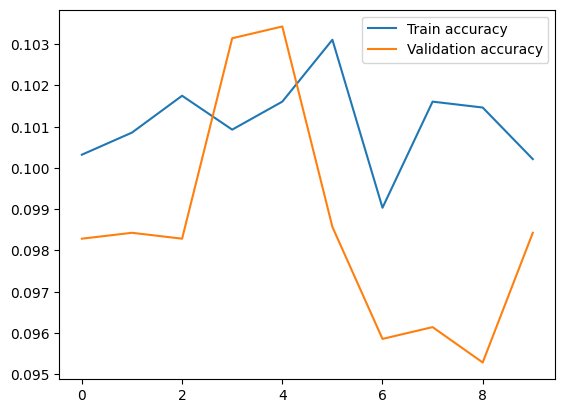

In [114]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [115]:
"""
What do you think is happening? Is the model training or not? The model has trained upto to a certain extent after that it's not training.
 You can see that both the training and validation accuracy are
 just roaming around 0.1. 
 One reason for this can be our model architecture. We had 26 filters
 in our first layer and 16 filters in our next layer. This funnel down approach
 works for dense layers but for Conv layers( which are good at feature extraction)
 we want them to extract more and more features.

 So lets change that to funne up --> 16 and 32 in the layers respectively
"""

"\nWhat do you think is happening? Is the model training or not? The model has trained upto to a certain extent after that it's not training.\n You can see that both the training and validation accuracy are\n just roaming around 0.1. \n One reason for this can be our model architecture. We had 26 filters\n in our first layer and 16 filters in our next layer. This funnel down approach\n works for dense layers but for Conv layers( which are good at feature extraction)\n we want them to extract more and more features.\n\n So lets change that to funne up --> 16 and 32 in the layers respectively\n"

In [116]:
# model initialization
cnn_model = tf.keras.Sequential()

"""adding the 1st layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

"""adding the 2nd layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(32, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [117]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [118]:
history = cnn_model.fit(X_train, Y_train, epochs=20, validation_split=0.2)

Epoch 1/20
875/875 [==============================] - 5s 4ms/step - loss: 2.4527 - accuracy: 0.1579 - val_loss: 2.0000 - val_accuracy: 0.2619
Epoch 2/20
875/875 [==============================] - 5s 6ms/step - loss: 1.8308 - accuracy: 0.3098 - val_loss: 1.7253 - val_accuracy: 0.3460
Epoch 3/20
875/875 [==============================] - 4s 4ms/step - loss: 1.6087 - accuracy: 0.4099 - val_loss: 1.5631 - val_accuracy: 0.4339
Epoch 4/20
875/875 [==============================] - 4s 4ms/step - loss: 1.4614 - accuracy: 0.4691 - val_loss: 1.4453 - val_accuracy: 0.4741
Epoch 5/20
875/875 [==============================] - 4s 5ms/step - loss: 1.3787 - accuracy: 0.5038 - val_loss: 1.3725 - val_accuracy: 0.5017
Epoch 6/20
875/875 [==============================] - 4s 4ms/step - loss: 1.3146 - accuracy: 0.5290 - val_loss: 1.3140 - val_accuracy: 0.5254
Epoch 7/20
875/875 [==============================] - 4s 4ms/step - loss: 1.2675 - accuracy: 0.5444 - val_loss: 1.3123 - val_accuracy: 0.5311
Epoch 

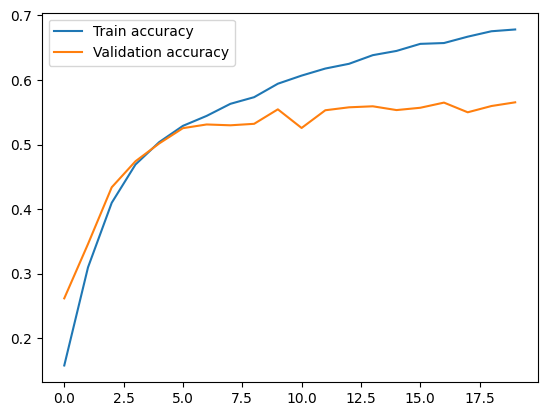

In [119]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [120]:
"""
Did our model improved??
Are we done with the job?
What is happening after 5( roughly ) epochs? Why is there a gap between
training and validation accuracy? 

Our training accuracy reached to 0.73( and still increasing ) but 
the validation accuracy seems to stagnate at 0.52.

Is our model overfitting on the training data so much that it can't work well 
on unseen data.

Ans- Our model has overfitted it has learnt unneccasary information from training data ,it cannot perform well at new data. 
"""

"\nDid our model improved??\nAre we done with the job?\nWhat is happening after 5( roughly ) epochs? Why is there a gap between\ntraining and validation accuracy? \n\nOur training accuracy reached to 0.73( and still increasing ) but \nthe validation accuracy seems to stagnate at 0.52.\n\nIs our model overfitting on the training data so much that it can't work well \non unseen data.\n\nAns- Our model has overfitted it has learnt unneccasary information from training data ,it cannot perform well at new data. \n"

In [121]:
"""
How are we gonna tackel this problem?
Well, we will see that in next part of this assignment.
Till then lets learn about about overfitting.
"""

'\nHow are we gonna tackel this problem?\nWell, we will see that in next part of this assignment.\nTill then lets learn about about overfitting.\n'

> **Well using Chatgpt to answer these question is something which everyone can think of right?? To create a difference write answer in your own terms after reading from web or reading the answer of Chatgpt.**
### **After all this is your midterm evaluation. Cheating is something we can catch easily** ( we have also done this )

In [122]:
"""
[CLARIFICATION]: Reading and understanding by searching on Chatgpt is not 
considered as cheating as long as you are writing that in your own word
( only problem is the crediblity of its information)

"""

'\n[CLARIFICATION]: Reading and understanding by searching on Chatgpt is not \nconsidered as cheating as long as you are writing that in your own word\n( only problem is the crediblity of its information)\n\n'

In [123]:
"""
Question: What is overfitting and underfitting below ( atleast 200 words )
Underfitting - A model is underfitted when it cannot perform well on both training and validation sets.If the validation accuracy is higher than trainig accuracy then our model is
underfitted.It may be due to that the model architecture is way too simple so That is unable to extract relevant features or the data on which we are training the model is less or contain
garbage values.It can also be because the hyperparameters that we specified are incorrect,or the number of epochs on which it is trained is way too less.

Overfitting - A model is overfitted when it performs well on training data but not on validation data.The model fits too much for the training data that it fails to generalise its performance on new data it encounters.The validation
accuracy will be lower than than the training accuracy in this case .It doesn't able to understand patterns in real data and make false predictions.The model has learn unncessary information during training process,which negatively affects its performance.
It may be due to the model architecture being too complex or the training data being less or simple.Also the hyperparameters that we define may be inappropriate.Data augmentation,
regularization techniques,etc. can reduce overfitting.

Link - 1) https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/
       2) https://medium.com/towards-data-science/deep-learning-3-more-on-cnns-handling-overfitting-2bd5d99abe5d

Answer: 
"""

"\nQuestion: What is overfitting and underfitting below ( atleast 200 words )\nUnderfitting - A model is underfitted when it cannot perform well on both training and validation sets.If the validation accuracy is higher than trainig accuracy then our model is\nunderfitted.It may be due to that the model architecture is way too simple so That is unable to extract relevant features or the data on which we are training the model is less or contain\ngarbage values.It can also be because the hyperparameters that we specified are incorrect,or the number of epochs on which it is trained is way too less.\n\nOverfitting - A model is overfitted when it performs well on training data but not on validation data.The model fits too much for the training data that it fails to generalise its performance on new data it encounters.The validation\naccuracy will be lower than than the training accuracy in this case .It doesn't able to understand patterns in real data and make false predictions.The model ha

In [124]:
"""
Question: What are regularization techniques in machine learning?(200 words)

Answer: Whenever our model is overfitted we need to resolve it to make the model better.Regularization helps us in achieving it.In this we apply constraints to feature so that
the model does not overlearns it or overfits it.Penalty factors are introduced which regularize the features and model has less chance to overfit training data.In context of
neural network we try to lower the weights so that it is neither too high nor too low.We are trying to reduce the weights because higher weights often lead to overfittingas as that 
feature is give more importance.It help prevent the model to become over complex which lead to overfit. There are several techniques of regularization - 
1) L1 Regularization- Works by penalising the model for higher weight.Helps in normalizing of weights so that the model is not depenent
   on a certain feature too much.Can also eliminate less important features from the model to reduce complexity.
2) L2 Regularization- work on the same principle as L1 regulariation.Penalises the model but the difference is that it add square 
   penalty term to the Loss function whereas L1 regularization adds absolute penalty term.
3) Dropout Layers- In this we drop random number of neurons from the layers to reduce the dependency of neuron from each other which can
   be helpful to deacrease the model complexity and reduce overfitting.
4) Early stopping - In this we stop the training the model as soon as it starts to overfit.When the validation loss and training 
   loss start to diverge in the graph we stop the training process.
5) Data Augmentation - We artificially create more data from the existing data by introducing some modifications which helps the
    model  to get generalised as it get trained on more diverse data.

Link = 1)https://medium.com/@aaweg-i/why-do-we-use-regularisation-in-ml-models-66921d704793
      2)https://www.analyticsvidhya.com/blog/2021/05/complete-guide-to-regularization-techniques-in-machine-learning/
"""

'\nQuestion: What are regularization techniques in machine learning?(200 words)\n\nAnswer: Whenever our model is overfitted we need to resolve it to make the model better.Regularization helps us in achieving it.In this we apply constraints to feature so that\nthe model does not overlearns it or overfits it.Penalty factors are introduced which regularize the features and model has less chance to overfit training data.In context of\nneural network we try to lower the weights so that it is neither too high nor too low.We are trying to reduce the weights because higher weights often lead to overfittingas as that \nfeature is give more importance.It help prevent the model to become over complex which lead to overfit. There are several techniques of regularization - \n1) L1 Regularization- Works by penalising the model for higher weight.Helps in normalizing of weights so that the model is not depenent\n   on a certain feature too much.Can also eliminate less important features from the model

In [125]:
"""
Question: What dropout layer and what does it do?( read it from Tensorflow.org and write in 200 words)

Answer: Dropout helps us to overcome the problem of overfitting.It randomly drops some of the neurons of the neural network Which can solve the problem of overfitting.It switches off
the percentage of neurons  in a layer randomly as specified using a hyperparameter. In a dense neural network every node is interconnected to other nodes which lead to co-dependency
on each other.Each neuron depict a particualr feature or pattern and the weights depict how  much that feature will affect the output.Higher weight means that particular feature is given more
importance. So the model might be able to depict that feature more than the other in network which can lead to overfitting.The way the dropout layers overcomes this is by randomly 
dropping neuron from the layers at each iteration and so the model cannot assign high weight to a particular neuron so it is forced to normalize the weight among all the neurons,which clearly
reduces the dependence on partiular neuron and doesnot allow the model to learn a particular feature too much.This overall helps in reducing the complexity and also increases speed and
learns more robust features which help it to generalize better on unseen data.
Link = 1)https://medium.com/@vivek-yadav/why-dropouts-prevent-overfitting-in-deep-neural-networks-937e2543a701
       2)https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/
"""

'\nQuestion: What dropout layer and what does it do?( read it from Tensorflow.org and write in 200 words)\n\nAnswer: Dropout helps us to overcome the problem of overfitting.It randomly drops some of the neurons of the neural network Which can solve the problem of overfitting.It switches off\nthe percentage of neurons  in a layer randomly as specified using a hyperparameter. In a dense neural network every node is interconnected to other nodes which lead to co-dependency\non each other.Each neuron depict a particualr feature or pattern and the weights depict how  much that feature will affect the output.Higher weight means that particular feature is given more\nimportance. So the model might be able to depict that feature more than the other in network which can lead to overfitting.The way the dropout layers overcomes this is by randomly \ndropping neuron from the layers at each iteration and so the model cannot assign high weight to a particular neuron so it is forced to normalize the 

In [126]:
"""
Question: What is L1 normalization? write its formulae as well( atleast 200 words )

Answer: L1 regularisation or Lasso regularization help prevent the model from overfitting .It works by penelising  the model for higher weight which can be the cause of overfitting.
It add penelising term to the loss function.It can remove certain features that are less revelant when the number of features are very large to prevevnt overfitting.
 .It add the absolute value of the weights to the loss function. Formulae - Loss = Error(y,y_predicted) + lambda*|sum(w)| where error is mean squared loss,lambda is regularization parameter
 and sum(w) is sum of weights. The model always try to minimise the loss hence the 'w' need to be minimised. It works by penelising the model for any weight which is too higher.
 lambda is carefully choosen for better performance of the model.It prevent overfitting by preventing extreme value of model parameters.It also brings sparsity to the model i.e 
 it helps reducing extra features by making some of the weights to zero.
  Link 1) https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c
       2) https://towardsdatascience.com/l1-and-l2-regularization-explained-874c3b03f668
 
"""

"\nQuestion: What is L1 normalization? write its formulae as well( atleast 200 words )\n\nAnswer: L1 regularisation or Lasso regularization help prevent the model from overfitting .It works by penelising  the model for higher weight which can be the cause of overfitting.\nIt add penelising term to the loss function.It can remove certain features that are less revelant when the number of features are very large to prevevnt overfitting.\n .It add the absolute value of the weights to the loss function. Formulae - Loss = Error(y,y_predicted) + lambda*|sum(w)| where error is mean squared loss,lambda is regularization parameter\n and sum(w) is sum of weights. The model always try to minimise the loss hence the 'w' need to be minimised. It works by penelising the model for any weight which is too higher.\n lambda is carefully choosen for better performance of the model.It prevent overfitting by preventing extreme value of model parameters.It also brings sparsity to the model i.e \n it helps r

In [127]:
"""
Question: What is L2 normalization? write its formulae as well( atleast 200 words )

Answer:L2 regularization or Ridge regularisation also helps to reduce the overfitting of a neural network.It works by penelising the model for higher weight.It works by adding a penalty term to the loss function
It adds the square of the weight as penelising term in loss function. Formulae - Loss = Error(y,y_predicted) + lambda*(sum(w)^2) where error is mean squared loss,lambda is regularization parameter
 and sum(w) is sum of weights.lambda*(sum(w)^2) is the regularisation term whose main task is to determine the model complexity,Just help to make the model simple.L2 regularization does not produce sparse model
 as the weights are not driven exactly to zero means the feature are not eliminated from the data unlike L1 regularisation.Lambda value should be carefully choosen as too high value make the model too simple and thus underfit.
 Whereas lower lambda value can make the model complex and promote overfitting.L2 regularisation have high penalty for a higher weight and low for smaller weight.  
Link 1)https://developers.google.com/machine-learning/crash-course/regularization-for-simplicity/l2-regularization
     2)https://medium.com/@aaweg-i/what-are-the-differences-between-l1-and-l2-regularisation-afd2663e12db
"""

'\nQuestion: What is L2 normalization? write its formulae as well( atleast 200 words )\n\nAnswer:L2 regularization or Ridge regularisation also helps to reduce the overfitting of a neural network.It works by penelising the model for higher weight.It works by adding a penalty term to the loss function\nIt adds the square of the weight as penelising term in loss function. Formulae - Loss = Error(y,y_predicted) + lambda*(sum(w)^2) where error is mean squared loss,lambda is regularization parameter\n and sum(w) is sum of weights.lambda*(sum(w)^2) is the regularisation term whose main task is to determine the model complexity,Just help to make the model simple.L2 regularization does not produce sparse model\n as the weights are not driven exactly to zero means the feature are not eliminated from the data unlike L1 regularisation.Lambda value should be carefully choosen as too high value make the model too simple and thus underfit.\n Whereas lower lambda value can make the model complex and 

In [128]:
"""
Question: What is data augmentation techniques and why is it needed in machine learning?( atleast 200 words )

Answer: In data augmentation we artificially try to generate new data from the existing data.Data augmentation helps to reduce both underfitting as well as overfitting.It helps 
to increase the training dataset by producing new data from existing data .It make the training data more diverse and large.By increasing the size of dataset the model reduces the
chance of overfitting the training data as it is unale to overfit it and which forces it to generalise over it.It need to done carefully as adding unnecessary variations in
the data set can affect the model performance in a bad way as noise is added and the relevant features are given much less weightage. Data augmentation may also be used for
big datasets as it increases diversity and reduce overfitting and helps in generalizing more to the data.It is more often used where it becomes expensive and difficult to 
collect data from a source.It helps in making the model more robust and add invariance to it.

Link = 1)https://www.studytonight.com/post/what-is-data-augmentation
       2)https://www.unite.ai/what-is-data-augmentation/

"""

'\nQuestion: What is data augmentation techniques and why is it needed in machine learning?( atleast 200 words )\n\nAnswer: In data augmentation we artificially try to generate new data from the existing data.Data augmentation helps to reduce both underfitting as well as overfitting.It helps \nto increase the training dataset by producing new data from existing data .It make the training data more diverse and large.By increasing the size of dataset the model reduces the\nchance of overfitting the training data as it is unale to overfit it and which forces it to generalise over it.It need to done carefully as adding unnecessary variations in\nthe data set can affect the model performance in a bad way as noise is added and the relevant features are given much less weightage. Data augmentation may also be used for\nbig datasets as it increases diversity and reduce overfitting and helps in generalizing more to the data.It is more often used where it becomes expensive and difficult to \ncol